<a href="https://www.kaggle.com/sid9300/usecase-paytm-analysis?scriptVersionId=85631265" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# **RBI - BANKWISE ATM/POS/CARD STATISTICS**
(https://www.rbi.org.in/scripts/ATMView.aspx)

In [1]:
# Installing to read excel file
!pip install openpyxl
!pip install xlrd

     |████████████████████████████████| 242 kB 286 kB/s            
     |████████████████████████████████| 96 kB 378 kB/s            


In [2]:
# Importing OS library
import os

import warnings
warnings.filterwarnings('ignore')

# Importing some basic library
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib import gridspec
import plotly.express as px
from matplotlib.ticker import StrMethodFormatter
import seaborn as sns

In [3]:
# Preparing the list of banks 
payment_banks = ['Total', 'PAYTM PAYMENTS BANK', 'AIRTEL PAYMENTS BANK']

# Preparing the list of columns to be renamed
renaming_columns_names = {'Unnamed: 1':'Bank Name',
                         'Unnamed: 2':'ATMs - On-site',
                         'Unnamed: 3':'ATMs - Off-site',
                         'Unnamed: 4':'PoS - On-site',
                         'Unnamed: 5':'PoS - Off-site',
                         'Unnamed: 6':'Micro ATMs',
                         'Unnamed: 7':'Bharat QR',
                         'Unnamed: 8':'Credit Cards - No. of outstanding cards as at the end of the month',
                         'Unnamed: 9':'Credit Cards - No. of Transactions (Actuals) - ATMs',
                         'Unnamed: 10':'Credit Cards - No. of Transactions (Actuals) - PoS',
                         'Unnamed: 11':'Credit Cards - Value of transactions (Rupees Lakh) - ATMs',
                         'Unnamed: 12':'Credit Cards - Value of transactions (Rupees Lakh) - PoS',
                         'Unnamed: 13':'Debit Cards - No. of outstanding cards as at the end of the month',
                         'Unnamed: 14':'Debit Cards - No. of Transactions (Actuals) - ATMs',
                         'Unnamed: 15':'Debit Cards - No. of Transactions (Actuals) - PoS',
                         'Unnamed: 16':'Debit Cards - Value of transactions (Rupees Lakh) - ATMs',
                         'Unnamed: 17':'Debit Cards - Value of transactions (Rupees Lakh) - PoS',}

# Preparing the list of columns to be renamed
renaming_columns_names_old = {'Unnamed: 1':'Bank Name',
                             'Unnamed: 2':'ATMs - On-site',
                             'Unnamed: 3':'ATMs - Off-site',
                             'Unnamed: 4':'PoS - On-site',
                             'Unnamed: 5':'PoS - Off-site',
                             'Unnamed: 6':'Credit Cards - No. of outstanding cards as at the end of the month',
                             'Unnamed: 7':'Credit Cards - No. of Transactions (Actuals) - ATMs',
                             'Unnamed: 8':'Credit Cards - No. of Transactions (Actuals) - PoS',
                             'Unnamed: 9':'Credit Cards - Value of transactions (Rupees Lakh) - ATMs',
                             'Unnamed: 10':'Credit Cards - Value of transactions (Rupees Lakh) - PoS',
                             'Unnamed: 11':'Debit Cards - No. of outstanding cards as at the end of the month',
                             'Unnamed: 12':'Debit Cards - No. of Transactions (Actuals) - ATMs',
                             'Unnamed: 13':'Debit Cards - No. of Transactions (Actuals) - PoS',
                             'Unnamed: 14':'Debit Cards - Value of transactions (Rupees Lakh) - ATMs',
                             'Unnamed: 15':'Debit Cards - Value of transactions (Rupees Lakh) - PoS',}

# Preparing the list of columns to be renamed
renaming_columns_names_very_old = {'Unnamed: 2':'Bank Name',
                                 'Unnamed: 3':'ATMs - On-site',
                                 'Unnamed: 4':'ATMs - Off-site',
                                 'Unnamed: 5':'PoS - On-site',
                                 'Unnamed: 6':'PoS - Off-site',
                                 'Unnamed: 7':'Credit Cards - No. of outstanding cards as at the end of the month',
                                 'Unnamed: 8':'Credit Cards - No. of Transactions (Actuals) - ATMs',
                                 'Unnamed: 9':'Credit Cards - No. of Transactions (Actuals) - PoS',
                                 'Unnamed: 10':'Credit Cards - Value of transactions (Rupees Lakh) - ATMs',
                                 'Unnamed: 11':'Credit Cards - Value of transactions (Rupees Lakh) - PoS',
                                 'Unnamed: 12':'Debit Cards - No. of outstanding cards as at the end of the month',
                                 'Unnamed: 13':'Debit Cards - No. of Transactions (Actuals) - ATMs',
                                 'Unnamed: 14':'Debit Cards - No. of Transactions (Actuals) - PoS',
                                 'Unnamed: 15':'Debit Cards - Value of transactions (Rupees Lakh) - ATMs',
                                 'Unnamed: 16':'Debit Cards - Value of transactions (Rupees Lakh) - PoS',}

In [4]:
# Creating an empty dataframe
payment_banks_df = pd.DataFrame()

# Reading each file of the dataset
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        path = os.path.join(dirname, filename)
        
        print("Reading the file " + path + "...")
        df = pd.read_excel(path)
        
        # Adding the two columns
        month = int(filename.split("_")[2].split('.')[0])
        year = int(filename.split("_")[1])
        
        if (month < 3 and year < 2021) or (year < 2020):
            # Finding the selected banks
            df = df[df["Unnamed: 2"].str.lower().isin([x.lower() for x in payment_banks])]
            for index, row in df.iterrows():
                for payment_bank in payment_banks:
                    if row["Unnamed: 2"].lower() == payment_bank.lower():
                        df.at[index, "Unnamed: 2"] = payment_bank
                
            print("  Data is found for {0}".format(','.join(df["Unnamed: 2"])))
        else:
            # Finding the selected banks
            df = df[df["Unnamed: 1"].str.lower().isin([x.lower() for x in payment_banks])]
            print("  Data is found for {0}".format(','.join(df["Unnamed: 1"])))
        
        df["Month"] = month
        df["Year"] = year
        print("  Data is found for {0}/{1}".format(month, year))
        
        if (month == 3 or month == 4) and year == 2020:
            # inserting column with static value in data frame
            df.insert(5, "Micro ATMs", 0)
            df.insert(6, "Bharat QR", 0)
            
            # Renaming the columns header name
            df.rename(renaming_columns_names_old, axis=1, inplace=True)
            
            # Removing the unnecessary columns
            df.drop(columns={"Unnamed: 0",}, axis=0, inplace=True)
        elif (month < 3 and year < 2021) or (year < 2020):
            # inserting column with static value in data frame
            df.insert(6, "Micro ATMs", 0)
            df.insert(7, "Bharat QR", 0)
            
            # Renaming the columns header name
            df.rename(renaming_columns_names_very_old, axis=1, inplace=True)
            
            # Removing the unnecessary columns
            df.drop(columns={"Unnamed: 0", "Unnamed: 1",}, axis=0, inplace=True)
        else:
            # Renaming the columns header name
            df.rename(renaming_columns_names, axis=1, inplace=True)
            
            # Removing the unnecessary columns
            df.drop(columns={"Unnamed: 0", "Unnamed: 18", "Unnamed: 19", "Unnamed: 20", "Unnamed: 21"}, axis=0, inplace=True, errors="ignore")
        
        if  (month < 7 and year < 2020) or (year < 2019):
            for index, row in df.iterrows():
                column_name = "Debit Cards - Value of transactions (Rupees Lakh) - ATMs"
                df.at[index, column_name] = float(df.at[index, column_name]) * 10
                
                column_name = "Debit Cards - Value of transactions (Rupees Lakh) - PoS"
                df.at[index, column_name] = float(df.at[index, column_name]) * 10
                
                column_name = "Credit Cards - Value of transactions (Rupees Lakh) - ATMs"
                df.at[index, column_name] = float(df.at[index, column_name]) * 10
                
                column_name = "Credit Cards - Value of transactions (Rupees Lakh) - PoS"
                df.at[index, column_name] = float(df.at[index, column_name]) * 10
        
        # Appending the data to dataframe 
        payment_banks_df = payment_banks_df.append(df, ignore_index = True)

Reading the file /kaggle/input/rbi-bankwise-atmposcard-statistics/ATM_2019_05.XLSX...
  Data is found for AIRTEL PAYMENTS BANK,PAYTM PAYMENTS BANK,Total
  Data is found for 5/2019
Reading the file /kaggle/input/rbi-bankwise-atmposcard-statistics/ATM_2020_01.XLS...
  Data is found for AIRTEL PAYMENTS BANK,PAYTM PAYMENTS BANK,Total
  Data is found for 1/2020
Reading the file /kaggle/input/rbi-bankwise-atmposcard-statistics/ATM_2019_01.XLSX...
  Data is found for AIRTEL PAYMENTS BANK,PAYTM PAYMENTS BANK,Total
  Data is found for 1/2019
Reading the file /kaggle/input/rbi-bankwise-atmposcard-statistics/ATM_2018_07.XLSX...
  Data is found for AIRTEL PAYMENTS BANK,PAYTM PAYMENTS BANK,Total
  Data is found for 7/2018
Reading the file /kaggle/input/rbi-bankwise-atmposcard-statistics/ATM_2021_05.XLSX...
  Data is found for AIRTEL PAYMENTS BANK,PAYTM PAYMENTS BANK,Total
  Data is found for 5/2021
Reading the file /kaggle/input/rbi-bankwise-atmposcard-statistics/ATM_2018_11.XLSX...
  Data is found

In [5]:
payment_banks_df.sort_values(by=['Year', 'Month'], ascending=True, inplace=True)
payment_banks_df

,Bank Name,ATMs - On-site,ATMs - Off-site,PoS - On-site,Micro ATMs,Bharat QR,PoS - Off-site,Credit Cards - No. of outstanding cards as at the end of the month,Credit Cards - No. of Transactions (Actuals) - ATMs,Credit Cards - No. of Transactions (Actuals) - PoS,Credit Cards - Value of transactions (Rupees Lakh) - ATMs,Credit Cards - Value of transactions (Rupees Lakh) - PoS,Debit Cards - No. of outstanding cards as at the end of the month,Debit Cards - No. of Transactions (Actuals) - ATMs,Debit Cards - No. of Transactions (Actuals) - PoS,Debit Cards - Value of transactions (Rupees Lakh) - ATMs,Debit Cards - Value of transactions (Rupees Lakh) - PoS,Month,Year
116,Total,107659,99080,3061817,0,0,0,36238240,745019,129980162,34089.227309,4143715.260622,846697494,741564703,301374550,25502167.571253,4110268.626916,1,2018
69,Total,107630,99029,3079487,0,0,0,36935373,689402,114753201,32163.015012,3765973.520909,855445369,718276986,282007092,24748715.119967,3703663.93455,2,2018
115,Total,106776,100276,3083067,0,0,0,37484955,785732,127292249,36934.191012,4430805.891631,861076200,774943830,318899139,26635018.085125,4185671.292338,3,2018
51,AIRTEL PAYMENTS BANK,0,0,0,0,0,0,0,0,0,0.0,0.0,1338589,0,333570,0.0,1608.94637,4,2018
52,PAYTM PAYMENTS BANK,1,0,0,0,0,0,0,0,0,0.0,0.0,34312263,403281,914728,7659.0227,4110.153109,4,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13,PAYTM PAYMENTS BANK,1,128,246806,0,0,0,0,0,0,0,0,64545128,1208401,1578110,43250.56094,15820.9152,5,2021
14,Total,110623,104031,4520278,424906,4862739,0,62393434,365748,134680997,18665.791885,5213064.167459,902308894,414951467,264713793,20248517.595134,4368349.099689,5,2021
85,AIRTEL PAYMENTS BANK,0,0,0,0,0,0,0,0,0,0,0,1669387,0,405376,0,4199.044613,6,2021
86,PAYTM PAYMENTS BANK,1,129,251702,0,0,0,0,0,0,0,0,64968372,1383146,1940575,48458.58676,18726.11941,6,2021


In [6]:
column_name = 'Debit Cards - No. of outstanding cards as at the end of the month'

def get_month_name(x):
    if x==1:
        return "JAN"
    elif x==2:
        return "FEB"
    elif x==3:
        return "MAR"
    elif x==4:
        return "APR"
    elif x==5:
        return "MAY"
    elif x==6:
        return "JUN"
    elif x==7:
        return "JUL"
    elif x==8:
        return "AUG"
    elif x==9:
        return "SEP"
    elif x==10:
        return "OCT"
    elif x==11:
        return "NOV"
    elif x==12:
        return "DEC"
    else:
        return "DEC"

def get_month(x):
    return str(get_month_name(x.Month)) + " - " + str(x.Year)

paytm = "paytm"
airtel = "airtel"

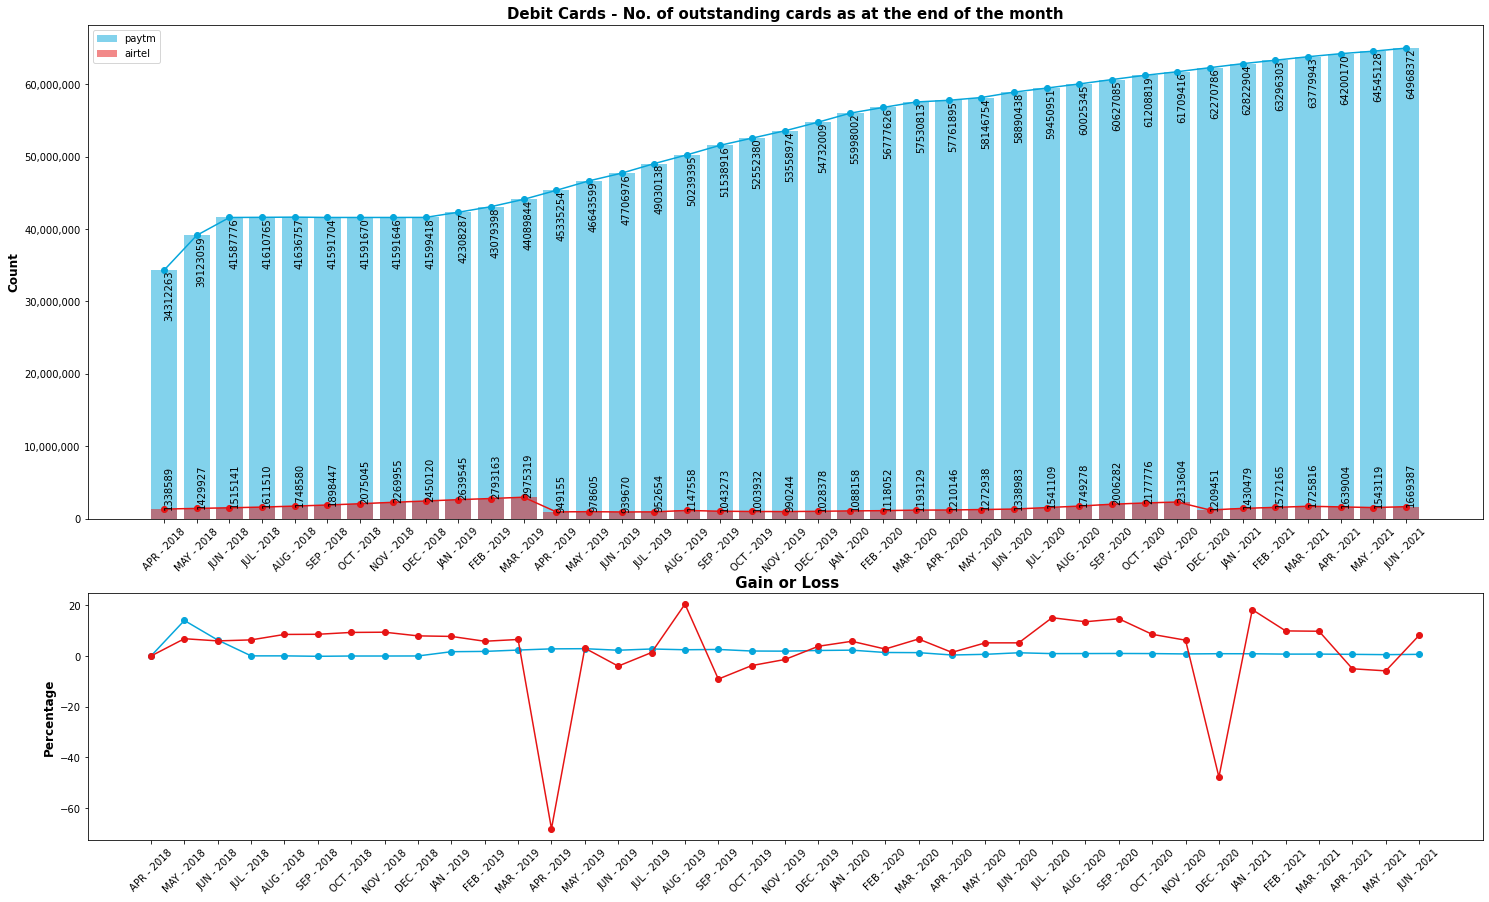

In [7]:
gain_percent = " Gain or Loss"

# set width of bar
fig = plt.subplots(figsize =(25, 15))

gs = gridspec.GridSpec(2, 1, height_ratios=[2, 1]) 

plt.subplot(gs[0])

# set height of bar
total_se = payment_banks_df[(payment_banks_df["Bank Name"] == payment_banks[0])]
paytm_se = payment_banks_df[(payment_banks_df["Bank Name"] == payment_banks[1])]
paytm_se[column_name + gain_percent] = round(paytm_se[column_name].pct_change().fillna(0)*100, 2)
airtel_se = payment_banks_df[(payment_banks_df["Bank Name"] == payment_banks[2])]
airtel_se[column_name + gain_percent] = round(airtel_se[column_name].pct_change().fillna(0)*100, 2)

plt.plot(paytm_se.apply(lambda x: get_month(x), axis=1) , paytm_se[column_name], marker='o', color="#06a6db")
plt.bar(paytm_se.apply(lambda x: get_month(x), axis=1) , paytm_se[column_name], alpha=0.5, label ='paytm', color="#06a6db")
plt.plot(airtel_se.apply(lambda x: get_month(x), axis=1), airtel_se[column_name], marker='o', color="#e61414")
plt.bar(airtel_se.apply(lambda x: get_month(x), axis=1) , airtel_se[column_name], alpha=0.5, label ='airtel', color="#e61414")
 
# Adding Xticks
plt.ylabel('Count', fontweight ='bold', fontsize = 12)
plt.title(column_name, fontweight ='bold', fontsize = 15)
plt.xticks(rotation=45)
plt.gca().yaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))

for i,j in zip(paytm_se.apply(lambda x: get_month(x), axis=1) , paytm_se[column_name]):
    plt.text(i, j, str(j),horizontalalignment="left", verticalalignment="top", rotation_mode="default", rotation=90)
    
for i,j in zip(airtel_se.apply(lambda x: get_month(x), axis=1) , airtel_se[column_name]):
    plt.text(i, j, str(j),horizontalalignment="left", verticalalignment="bottom", rotation_mode="default", rotation=90)

plt.legend()
    
plt.subplot(gs[1])

plt.plot(paytm_se.apply(lambda x: get_month(x), axis=1) , paytm_se[column_name + gain_percent], marker='o', color='#06a6db')
plt.plot(airtel_se.apply(lambda x: get_month(x), axis=1) , airtel_se[column_name + gain_percent], marker='o', color='#e61414')

# Adding Xticks
plt.ylabel('Percentage', fontweight ='bold', fontsize = 12)
plt.title(gain_percent, fontweight ='bold', fontsize = 15)
plt.xticks(rotation=45)

plt.show()

In [8]:
paytm_se_quarter = paytm_se[paytm_se.Month.isin([3,6,9,12])].sort_values(by=['Year', 'Month'], ascending=False)
airtel_se_quarter = airtel_se[airtel_se.Month.isin([3,6,9,12])].sort_values(by=['Year', 'Month'], ascending=False)
total_se_quarter = total_se[total_se.Month.isin([3,6,9,12])].sort_values(by=['Year', 'Month'], ascending=False)

paytm_se_quarter_cards = paytm_se_quarter[column_name].astype(int).reset_index(drop=True)
airtel_se_quarter_cards = airtel_se_quarter[column_name].astype(int).reset_index(drop=True)
others_se_quarter_cards = total_se_quarter[column_name].astype(int).reset_index(drop=True) - paytm_se_quarter_cards - airtel_se_quarter_cards
others_se_quarter_cards = others_se_quarter_cards[:-1]

data = dict(Quantity=paytm_se_quarter[column_name].append(airtel_se_quarter[column_name]).astype(int),
            Stage=paytm_se_quarter.apply(lambda x: get_month(x), axis=1).append(airtel_se_quarter.apply(lambda x: get_month(x), axis=1)),
            PaymentBanks=[paytm]*len(paytm_se_quarter) + [airtel]*len(airtel_se_quarter))
    
fig = px.funnel(data, y='Stage', x='Quantity', color="PaymentBanks",
                color_discrete_map={paytm: "#06a6db", airtel: "#e61414"},
                template="simple_white",
                title= column_name + " (Q-on-Q)",
                labels={"Stage": ""})
fig.show()

In [9]:
month_se_quarter = paytm_se_quarter.apply(lambda x: get_month(x), axis=1).reset_index(drop=True)

data = dict(Quantity=paytm_se_quarter_cards.append(airtel_se_quarter_cards).append(others_se_quarter_cards),
            Stage=month_se_quarter.append(month_se_quarter).append(month_se_quarter),
            PaymentBanks=[paytm]*len(paytm_se_quarter) + [airtel]*len(airtel_se_quarter) + ["others"]*len(others_se_quarter_cards))
    
fig = px.funnel(data, y='Stage', x='Quantity', color="PaymentBanks",
                color_discrete_map={paytm: "#06a6db", airtel: "#e61414", "others": "green"},
                template="simple_white",
                title= column_name + " (Q-on-Q)",
                labels={"Stage": ""})
fig.show()

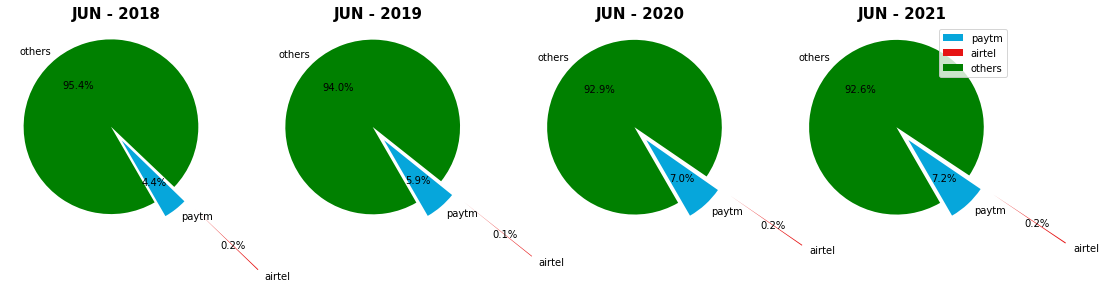

In [10]:
month_number = [6]

years = paytm_se[paytm_se.Month.isin(month_number)].Year.astype(int)
paytm_total = paytm_se[paytm_se.Month.isin(month_number)][column_name].astype(int).reset_index(drop=True)
airtel_total = airtel_se[airtel_se.Month.isin(month_number)][column_name].astype(int).reset_index(drop=True)
others_total = payment_banks_df[(payment_banks_df["Bank Name"] == payment_banks[0]) 
                                & (payment_banks_df.Month.isin(month_number))][column_name].astype(int).reset_index(drop=True)
others_total = others_total - paytm_total - airtel_total

plt.figure(figsize=(18,10))

count = 1
for i, j, k, l in zip(paytm_total, airtel_total, others_total, years):
    plt.subplot(1, len(paytm_total), count)
    items = [i, j, k]
    plt.pie(items, startangle = 300, explode=[0.10, 1.25, 0.10], labels = [paytm, airtel, "others"], 
            colors = ["#06a6db", "#e61414", "green"], autopct='%1.1f%%', )
    plt.title(get_month_name(month_number[0]) + " - "+ str(l), fontweight ='bold', fontsize = 15)
    count+=1

plt.legend()
plt.show()

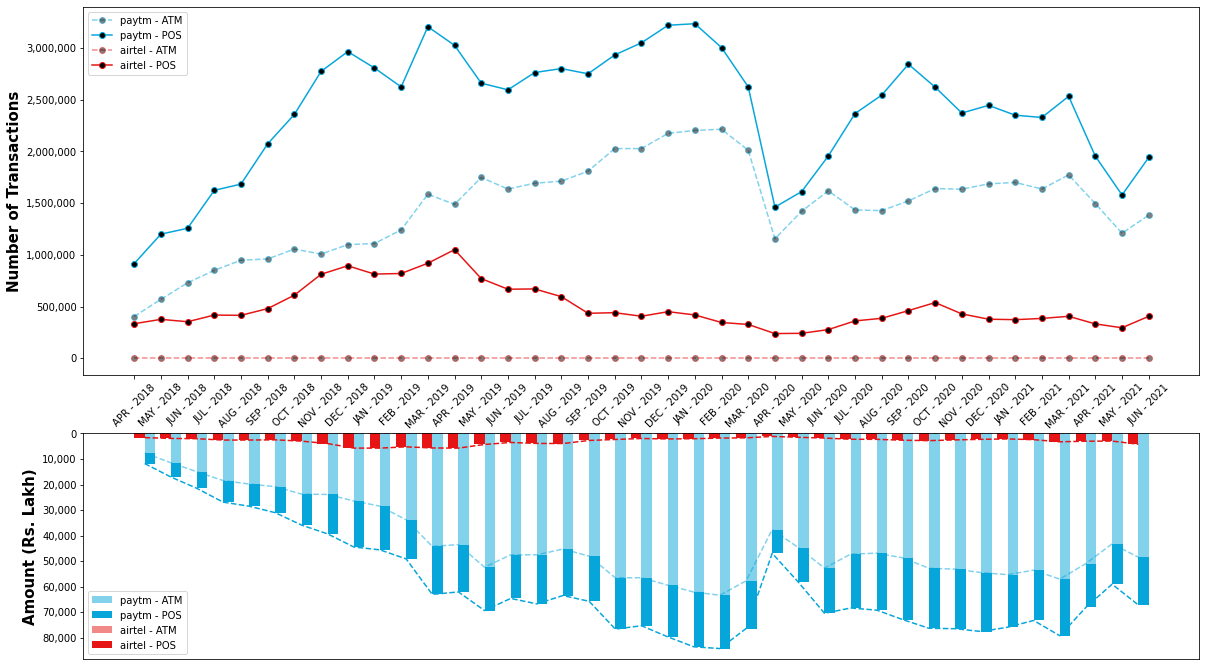

In [11]:
column_name_atm = "Debit Cards - No. of Transactions (Actuals) - ATMs"
column_name_pos = "Debit Cards - No. of Transactions (Actuals) - PoS"

column_name_atm_amt = "Debit Cards - Value of transactions (Rupees Lakh) - ATMs"
column_name_pos_amt = "Debit Cards - Value of transactions (Rupees Lakh) - PoS"

paytm_se_atm = paytm_se[column_name_atm]
paytm_se_pos = paytm_se[column_name_pos]
paytm_se_atm_amt = paytm_se[column_name_atm_amt]
paytm_se_pos_amt = paytm_se[column_name_pos_amt]

airtel_se_atm = airtel_se[column_name_atm]
airtel_se_pos = airtel_se[column_name_pos]
airtel_se_atm_amt = airtel_se[column_name_atm_amt]
airtel_se_pos_amt = airtel_se[column_name_pos_amt]

# Create Fig and gridspec
fig = plt.figure(figsize =(20, 12))
grid = plt.GridSpec(5, 1, hspace=0.7, wspace=0.2)

# Define the axes
ax_main = fig.add_subplot(grid[0:3,0])
ax_bottom = fig.add_subplot(grid[3:5, 0], xticklabels=[], yticklabels=[])

ax_main.plot(paytm_se.apply(lambda x: get_month(x), axis=1), paytm_se_atm, marker='o', 
         color='#06a6db', alpha=0.50, mfc='black', linestyle='--', label=paytm + " - ATM")
ax_main.plot(paytm_se.apply(lambda x: get_month(x), axis=1), paytm_se_pos, marker='o', 
         color='#06a6db', mfc='black', label=paytm + " - POS")
ax_main.plot(airtel_se.apply(lambda x: get_month(x), axis=1), airtel_se_atm, marker='o', 
         color='#e61414', alpha=0.50, mfc='black', linestyle='--', label=airtel + " - ATM")
ax_main.plot(airtel_se.apply(lambda x: get_month(x), axis=1), airtel_se_pos, marker='o', 
         color='#e61414', mfc='black', label=airtel + " - POS")

ax_main.yaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))
ax_main.yaxis.set_label("No. of Transactions (Actuals)")
ax_main.legend(loc="upper left")
ax_main.set_ylabel("Number of Transactions", fontweight ='bold', fontsize = 15)
ax_main.xaxis.set_tick_params(rotation=45)

ax_bottom.bar(paytm_se.apply(lambda x: get_month(x), axis=1), paytm_se_atm_amt, color='#06a6db', alpha=0.50, 
           label=paytm + " - ATM", width= 0.4, align='edge',)
ax_bottom.plot(paytm_se.apply(lambda x: get_month(x), axis=1), paytm_se_atm_amt, color='#06a6db', alpha=0.50,
              linestyle='--')
ax_bottom.bar(paytm_se.apply(lambda x: get_month(x), axis=1), paytm_se_pos_amt, bottom = paytm_se_atm_amt, color='#06a6db',
          label=paytm + " - POS", width= 0.4, align='edge',)
ax_bottom.plot(paytm_se.apply(lambda x: get_month(x), axis=1), paytm_se_pos_amt + paytm_se_atm_amt, color='#06a6db',
              linestyle='--')

ax_bottom.bar(paytm_se.apply(lambda x: get_month(x), axis=1), airtel_se_atm_amt, color='#e61414', alpha=0.50,
             label=airtel + " - ATM", width= -0.4,align='edge',)
ax_bottom.plot(paytm_se.apply(lambda x: get_month(x), axis=1), airtel_se_atm_amt, color='#e61414', alpha=0.50,
              linestyle='--')
ax_bottom.bar(paytm_se.apply(lambda x: get_month(x), axis=1), airtel_se_pos_amt, bottom = airtel_se_atm_amt, color='#e61414',
             label=airtel + " - POS", width= -0.4,align='edge',)
ax_bottom.plot(paytm_se.apply(lambda x: get_month(x), axis=1), airtel_se_pos_amt + airtel_se_atm_amt, color='#e61414',
              linestyle='--')

ax_bottom.set_ylabel("Amount (Rs. Lakh)", fontweight ='bold', fontsize = 15)
ax_bottom.xaxis.set_ticks([])
ax_bottom.yaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))
ax_bottom.invert_yaxis()

ax_bottom.legend()

plt.show()

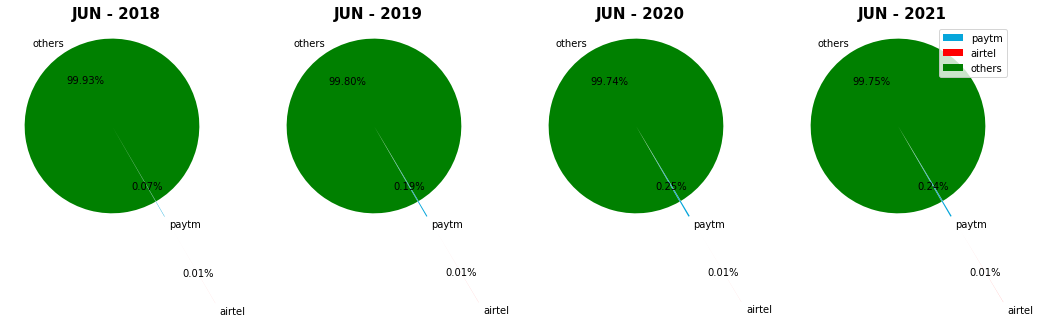

In [12]:
month_number = [6]

years = paytm_se[paytm_se.Month.isin(month_number)].Year.astype(int)
paytm_total = (paytm_se[paytm_se.Month.isin(month_number)][column_name_atm_amt].astype(int).reset_index(drop=True) +
                paytm_se[paytm_se.Month.isin(month_number)][column_name_pos_amt].astype(int).reset_index(drop=True))
airtel_total = (airtel_se[airtel_se.Month.isin(month_number)][column_name_atm_amt].astype(int).reset_index(drop=True) + 
                 airtel_se[airtel_se.Month.isin(month_number)][column_name_pos_amt].astype(int).reset_index(drop=True))
others_total = (payment_banks_df[(payment_banks_df["Bank Name"] == payment_banks[0]) 
                                & (payment_banks_df.Month.isin(month_number))][column_name_atm_amt].astype(int).reset_index(drop=True) +
                payment_banks_df[(payment_banks_df["Bank Name"] == payment_banks[0]) 
                                & (payment_banks_df.Month.isin(month_number))][column_name_pos_amt].astype(int).reset_index(drop=True))

others_total = others_total - paytm_total - airtel_total

plt.figure(figsize=(18,10))

count = 1
for i, j, k, l in zip(paytm_total, airtel_total, others_total, years):
    plt.subplot(1, len(paytm_total), count)
    items = [i, j, k]
    plt.pie(items, startangle = 300, explode=[0.10, 1.25, 0.10], labels = [paytm, airtel, "others"], 
            colors = ["#06a6db", "red", "green"], autopct='%.2f%%')
    plt.title(get_month_name(month_number[0]) + " - "+ str(l), fontweight ='bold', fontsize = 15)
    count+=1

plt.legend()
plt.show()

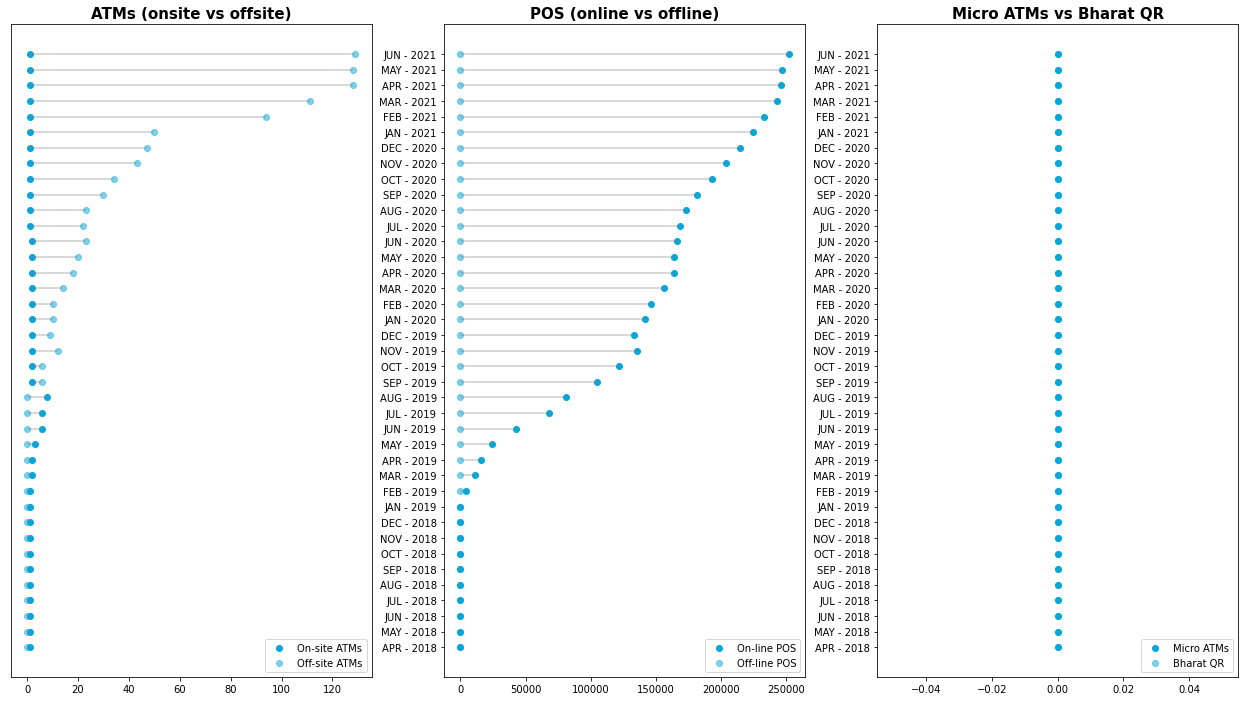

In [13]:
column_name_atm_on = 'ATMs - On-site'
column_name_atm_off = 'ATMs - Off-site'

column_name_pos_on = 'PoS - On-site'
column_name_pos_off = 'PoS - Off-site'

column_name_micro_atm = 'Micro ATMs'
column_name_bharat_qr = 'Bharat QR'

paytm_se_atm_on = paytm_se[column_name_atm_on]
paytm_se_atm_off = paytm_se[column_name_atm_off]
paytm_se_pos_on = paytm_se[column_name_pos_on]
paytm_se_pos_off = paytm_se[column_name_pos_off]
paytm_se_micro_atm = paytm_se[column_name_micro_atm]
paytm_se_bharat_qr = paytm_se[column_name_bharat_qr]

month_se = paytm_se.apply(lambda x: get_month(x), axis=1)

plt.figure(figsize=(22,12))

plt.subplot(1,3,1)
plt.hlines(y=month_se, xmin=paytm_se_atm_on, xmax=paytm_se_atm_off, color='grey', alpha=0.4)
plt.scatter(paytm_se_atm_on, month_se, color='#06a6db', label='On-site ATMs')
plt.scatter(paytm_se_atm_off, month_se, color='#06a6db', alpha=0.5 , label='Off-site ATMs')
plt.legend(loc="lower right")
plt.yticks([])
plt.title("ATMs (onsite vs offsite)", fontweight ='bold', fontsize = 15)

plt.subplot(1,3,2)
plt.hlines(y=month_se, xmin=paytm_se_pos_on, xmax=paytm_se_pos_off, color='grey', alpha=0.4)
plt.scatter(paytm_se_pos_on, month_se, color='#06a6db', alpha=1, label='On-line POS')
plt.scatter(paytm_se_pos_off, month_se, color='#06a6db', alpha=0.5 , label='Off-line POS')
plt.legend(loc="lower right")
plt.title("POS (online vs offline)", fontweight ='bold', fontsize = 15)

plt.subplot(1,3,3)
plt.hlines(y=month_se, xmin=paytm_se_micro_atm, xmax=paytm_se_bharat_qr, color='grey', alpha=0.4)
plt.scatter(paytm_se_micro_atm, month_se, color='#06a6db', alpha=1, label='Micro ATMs')
plt.scatter(paytm_se_bharat_qr, month_se, color='#06a6db', alpha=0.5 , label='Bharat QR')
plt.legend(loc="lower right")
plt.title("Micro ATMs vs Bharat QR", fontweight ='bold', fontsize = 15)

plt.show()

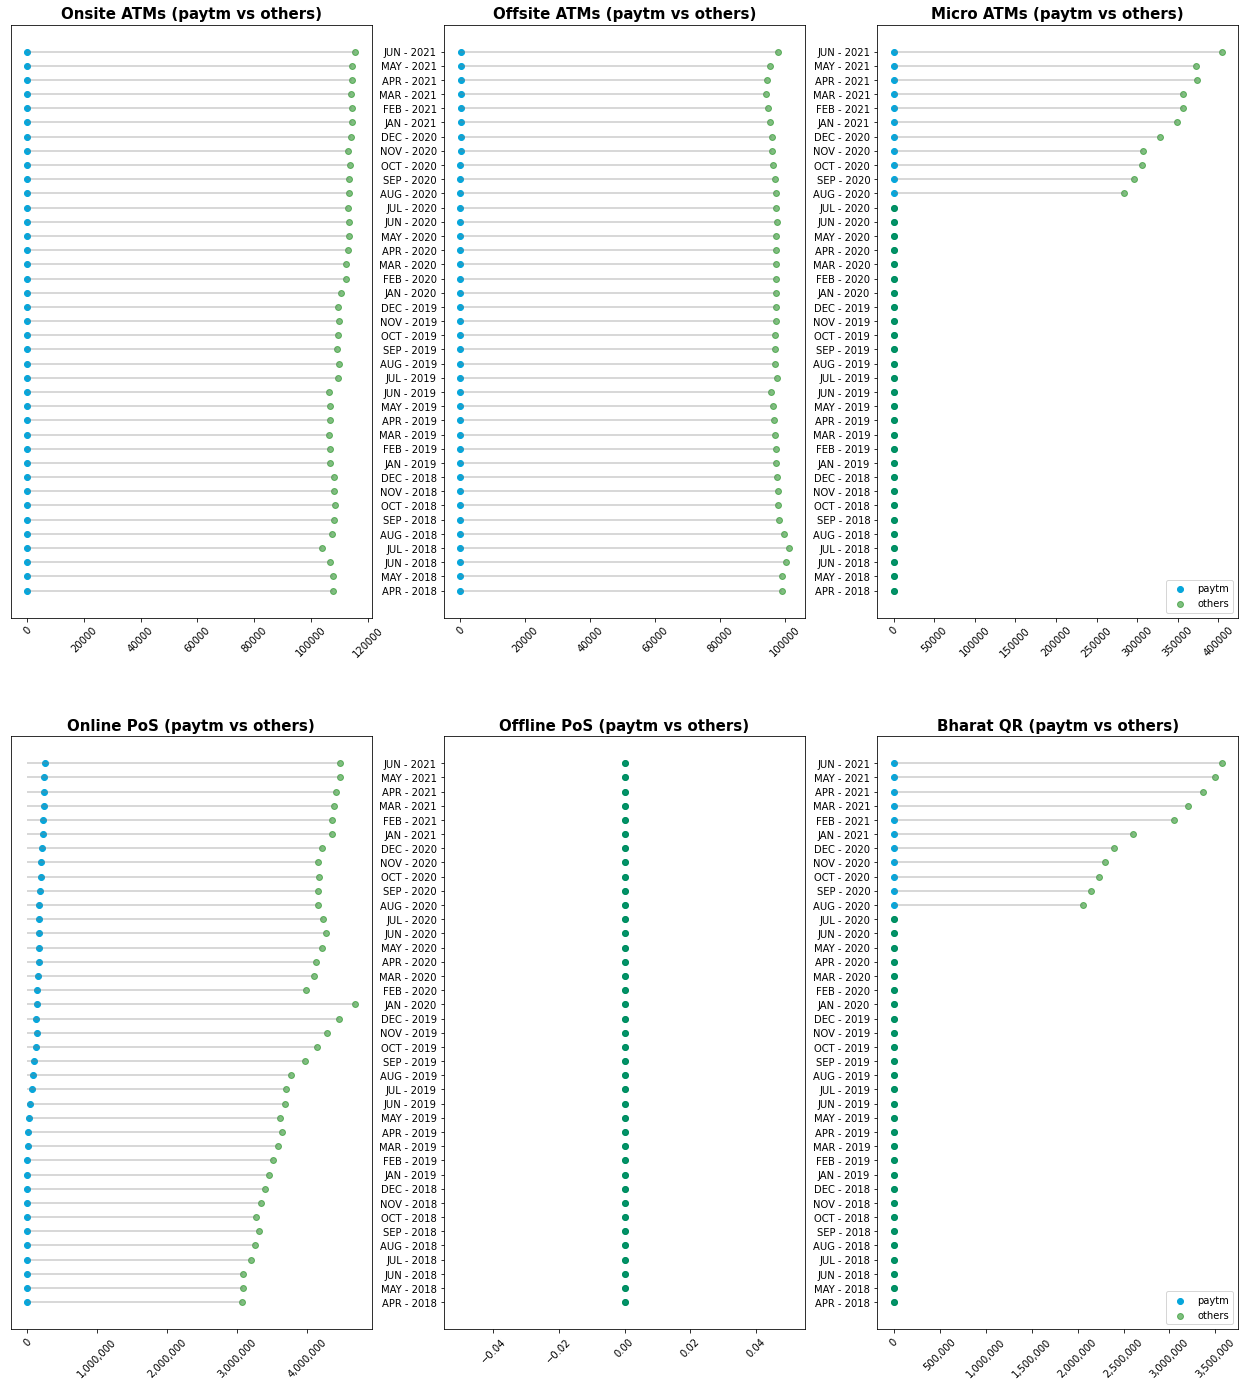

In [14]:
others_se_atm_on = (total_se[column_name_atm_on].reset_index(drop=True) - paytm_se_atm_on.reset_index(drop=True))[:-3]
others_se_atm_off = (total_se[column_name_atm_off].reset_index(drop=True) - paytm_se_atm_off.reset_index(drop=True))[:-3]
others_se_pos_on = (total_se[column_name_pos_on].reset_index(drop=True) - paytm_se_pos_on.reset_index(drop=True))[:-3]
others_se_pos_off = (total_se[column_name_pos_off].reset_index(drop=True) - paytm_se_pos_off.reset_index(drop=True))[:-3]
others_se_micro_atm = (total_se[column_name_micro_atm].reset_index(drop=True) - paytm_se_micro_atm.reset_index(drop=True))[:-3]
others_se_bharat_qr = (total_se[column_name_bharat_qr].reset_index(drop=True) - paytm_se_bharat_qr.reset_index(drop=True))[:-3]

plt.figure(figsize=(22,24))

plt.subplot(2,3,1)
plt.hlines(y=month_se, xmin=0, xmax=others_se_atm_on, color='grey', alpha=0.4)
plt.scatter(paytm_se_atm_on, month_se, color='#06a6db', label='paytm')
plt.scatter(others_se_atm_on, month_se, color='green', alpha=0.5 , label='others')
plt.yticks([])
plt.title("Onsite ATMs (paytm vs others)", fontweight ='bold', fontsize = 15)
plt.xticks(rotation=45)

plt.subplot(2,3,2)
plt.hlines(y=month_se, xmin=0, xmax=others_se_atm_off, color='grey', alpha=0.4)
plt.scatter(paytm_se_atm_off, month_se, color='#06a6db', label='paytm')
plt.scatter(others_se_atm_off, month_se, color='green', alpha=0.5 , label='others')
plt.title("Offsite ATMs (paytm vs others)", fontweight ='bold', fontsize = 15)
plt.xticks(rotation=45)

plt.subplot(2,3,4)
plt.hlines(y=month_se, xmin=0, xmax=others_se_pos_on, color='grey', alpha=0.4)
plt.scatter(paytm_se_pos_on, month_se, color='#06a6db', label='paytm')
plt.scatter(others_se_pos_on, month_se, color='green', alpha=0.5 , label='others')
plt.yticks([])
plt.title("Online PoS (paytm vs others)", fontweight ='bold', fontsize = 15)
plt.gca().xaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))
plt.xticks(rotation=45)

plt.subplot(2,3,5)
plt.hlines(y=month_se, xmin=0, xmax=others_se_pos_off, color='grey', alpha=0.4)
plt.scatter(paytm_se_pos_off, month_se, color='#06a6db', label='paytm')
plt.scatter(others_se_pos_off, month_se, color='green', alpha=0.5 , label='others')
plt.title("Offline PoS (paytm vs others)", fontweight ='bold', fontsize = 15)
plt.xticks(rotation=45)

plt.subplot(2,3,3)
plt.hlines(y=month_se, xmin=0, xmax=others_se_micro_atm, color='grey', alpha=0.4)
plt.scatter(paytm_se_micro_atm, month_se, color='#06a6db', label='paytm')
plt.scatter(others_se_micro_atm, month_se, color='green', alpha=0.5 , label='others')
plt.legend(loc="lower right")
plt.title("Micro ATMs (paytm vs others)", fontweight ='bold', fontsize = 15)
plt.xticks(rotation=45)

plt.subplot(2,3,6)
plt.hlines(y=month_se, xmin=0, xmax=others_se_bharat_qr, color='grey', alpha=0.4)
plt.scatter(paytm_se_bharat_qr, month_se, color='#06a6db', label='paytm')
plt.scatter(others_se_bharat_qr, month_se, color='green', alpha=0.5 , label='others')
plt.legend(loc="lower right")
plt.title("Bharat QR (paytm vs others)", fontweight ='bold', fontsize = 15)
plt.gca().xaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))
plt.xticks(rotation=45)

plt.show()

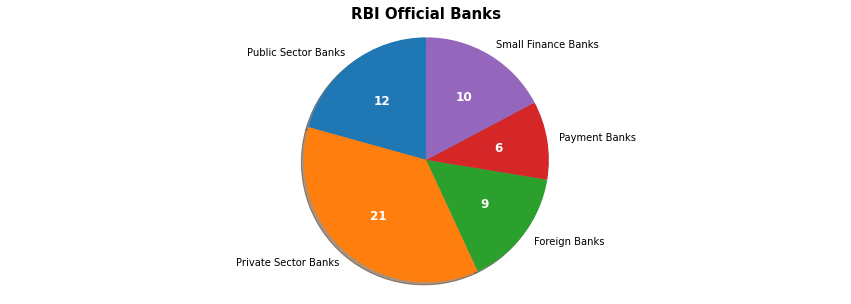

In [15]:
from pandas.plotting import table

# sample data
raw_data = {'RBI': ['Public Sector Banks', 'Private Sector Banks', 'Foreign Banks','Payment Banks', 'Small Finance Banks'],
        'Jun 2021': [12, 21, 9, 6, 10]}
df = pd.DataFrame(raw_data, columns = ['RBI', 'Jun 2021'])
#df['Total'] = df['Jun 2021'] 

plt.figure(figsize=(15,5))
# plot chart
p, tx, autotexts= plt.pie(df['Jun 2021'], startangle=90, shadow=True, labels=df['RBI'], autopct="")

for i, a in enumerate(autotexts):
    a.set_text("{}".format(df['Jun 2021'][i]))
    a.set_color("white")
    a.set_weight("bold")
    a.set_size(12)

plt.title("RBI Official Banks", fontweight ='bold', fontsize = 15)
plt.axis('equal')
plt.show()